<div style="background-color:#000;"><img src="https://github.com/pyquantnews/PyQuantNewsletter/blob/main/pqn.png?raw=1"></img></div>

This code uses Hidden Markov Models (HMM) to identify regimes in financial time series data. It downloads historical price data, calculates returns and ranges, and uses them as features for the HMM. The model is fitted with the features to identify different market states. The identified states are then plotted to visualize market regime changes. This is useful for understanding and predicting market behavior.

Requirements.txt - add some install statements


In [12]:
pip install pandas yfinance hmmlearn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 8.7 MB/s eta 0:00:00


In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
import hmmlearn.hmm as hmm


Download historical price data for SPY from Yahoo Finance

In [14]:
data = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


Calculate log returns of the closing prices

In [15]:
returns = np.log(data.Close / data.Close.shift(1))

Calculate the range as the difference between high and low prices

In [16]:
range = (data.High - data.Low)

Concatenate returns and range into a single DataFrame and drop any missing values

In [17]:
features = pd.concat([returns, range], axis=1).dropna()
features.columns = ["returns", "range"]

Initialize a Gaussian Hidden Markov Model with 3 states and fit it to the features

In [20]:
model = hmm.GaussianHMM(
    n_components=3,
    covariance_type="full",
    n_iter=1000,
)
model.fit(features)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000)

Predict the hidden states for the given features and store them in a Series

In [22]:
states = pd.Series(model.predict(features), index=data.index[1:])
states.name = "state"

Plot a histogram of the hidden states

<Axes: >

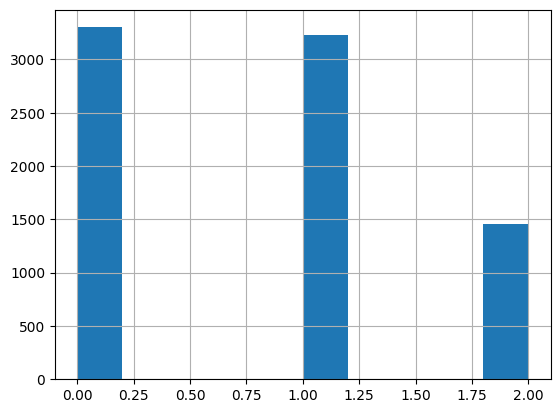

In [23]:
states.hist()

Define a color map for the different states

In [28]:
color_map = {
    0.0: "green",
    1.0: "orange",
    2.0: "red"
}

Concatenate the closing prices and the states, drop missing values,
set state as a hierarchical index, unstack the state index, and plot the closing prices with different colors for each state

In [31]:
(
    pd.concat([data.Close, states], axis=1)
    .dropna()
    .set_index("state", append=True)
    .Close
    .unstack("state")
    .plot(color=color_map)
)

AttributeError: 'DataFrame' object has no attribute 'Close'